# Generating custom artifacts in your evaluation

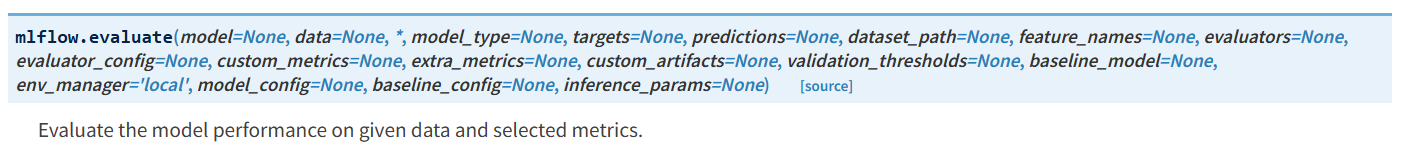

In [ ]:
import mlflow
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pandas as pd
import random

from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root


# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
# create the experiment
experiment_name = "custom-artifacts"
try: 
    _ = mlflow.create_experiment(name=experiment_name)
except mlflow.exceptions.MlflowException:
    experiment = mlflow.get_experiment_by_name(name=experiment_name)
# set experiment
experiment = mlflow.set_experiment(experiment_name)

In [ ]:
test_df = pd.DataFrame({
    "predictions": [random.randint(0, 1) for _ in range(100)],
    "targets": [random.randint(0, 1) for _ in range(100)]
})
test_df.head()

In [ ]:
# Custom precision recal curve
def custom_precision_recall_curve(eval_df, builtin_metrics, artifacts_dir):
    """
    Custom precision recall curve.

    :param eval_df: The pandas DataFrame containing the predictions and targets.
    :param builtin_metrics: The built-in metrics.
    :param artifacts_dir: The directory to save the artifacts.
    :return: A dictionary containing the custom precision recall curve.
    """
    targets = eval_df["target"]
    predictions = eval_df["prediction"]
    pr_display = PrecisionRecallDisplay.from_predictions(targets, predictions)
    return {"precision_recall_curve": pr_display.figure_}

def custom_csv_output(eval_df, builtin_metrics, artifacts_dir):
    """
    Custom CSV output.  

    :param eval_df: The pandas DataFrame containing the predictions and targets.
    :param builtin_metrics: The built-in metrics.
    :param artifacts_dir: The directory to save the artifacts.
    :return: A dictionary containing the custom CSV output
    """
    eval_df = eval_df.copy()
    eval_df["custom_column"] = 2 * eval_df["prediction"] 
    path = artifacts_dir + "/custom_output.csv"
    eval_df.to_csv(path, index=False)
    return {"custom_csv_output": path}

In [ ]:
results = mlflow.evaluate(
    data=test_df,
    model_type="classifier",
    targets="targets",
    predictions="predictions",
    custom_artifacts=[custom_precision_recall_curve, custom_csv_output]
)

In [ ]:
results.artifacts